# Lab Assignment 3: Image Feature Detection and Description
Python Notebook for Visualisation and Debugging

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
%reload_ext autoreload
%autoreload 2

# import your code
from lab3 import compute_DoG, compute_harris_response, harris_keypoint_nms, match_features

## Harris Corner Detector


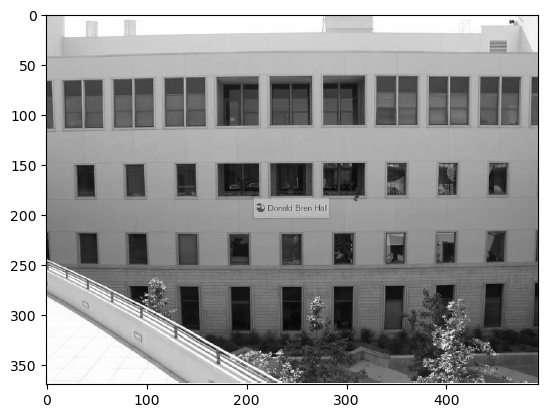

In [23]:
image_path = "building.jpg"
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

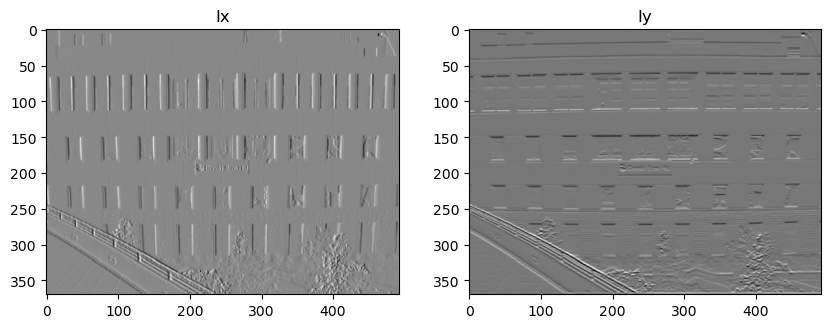

In [24]:
Ix = cv2.Sobel(gray_image, cv2.CV_32F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray_image, cv2.CV_32F, 0, 1, ksize=3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ix, cmap="gray")
plt.title("Ix")
plt.subplot(1, 2, 2)
plt.imshow(Iy, cmap="gray")
plt.title("Iy")
plt.show()

Text(0.5, 1.0, 'Harris Response Map')

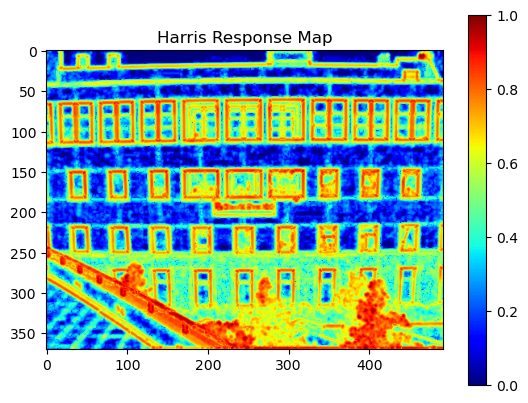

In [25]:
k = 0.04
sigma = 1.0
harris_response = compute_harris_response(Ix, Iy, k, sigma)
# Normalize the response for better visualization
harris_response_vis = np.log(1 + np.abs(harris_response))
harris_response_vis = (harris_response_vis - harris_response_vis.min()) / (
    harris_response_vis.max() - harris_response_vis.min()
)
plt.imshow(harris_response_vis, cmap="jet")
plt.colorbar()
plt.title("Harris Response Map")

(np.float64(-0.5), np.float64(491.5), np.float64(369.5), np.float64(-0.5))

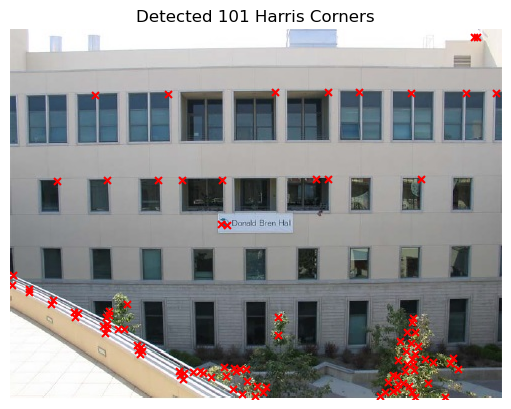

In [26]:
threshold = 0.1 * np.max(harris_response)
keypoints = harris_keypoint_nms(harris_response, threshold, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.scatter(*zip(*keypoints), c="r", s=25, marker="x")
plt.title(f"Detected {len(keypoints)} Harris Corners")
plt.axis("off")

## SIFT (Scale-Invariant Feature Transform)


(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

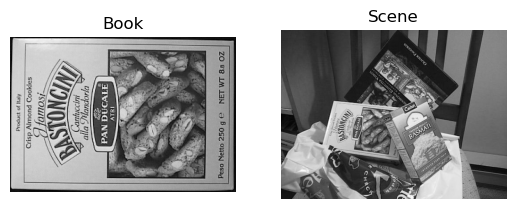

In [27]:
img1 = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("books.jpg", cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="gray")
plt.title("Book")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap="gray")
plt.title("Scene")
plt.axis("off")

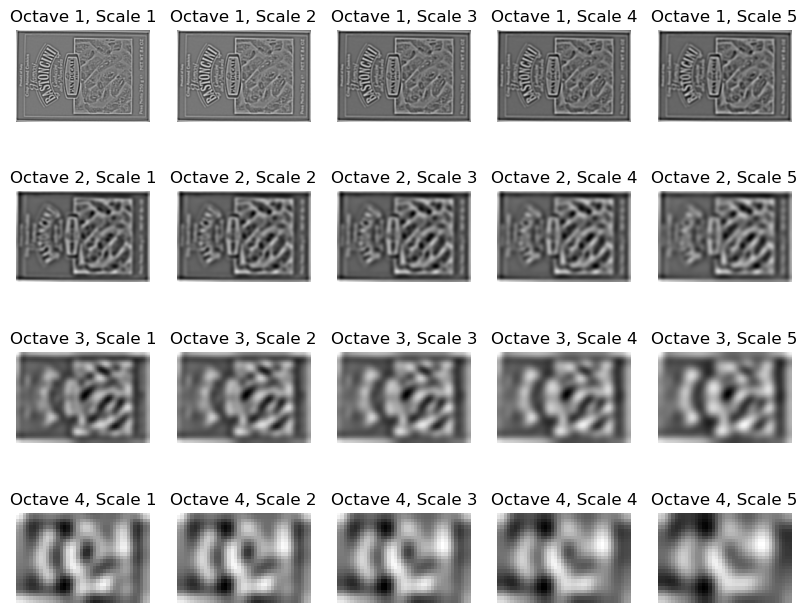

In [28]:
sigma = 1.6
num_octaves = 4
num_scales = 5
dogs = compute_DoG(img1, sigma, num_octaves, num_scales)
plt.figure(figsize=(num_scales * 2, num_octaves * 2))
for i in range(num_octaves):
    for j in range(num_scales):
        plt.subplot(num_octaves, num_scales, i * num_scales + j + 1)
        plt.imshow(dogs[i][j], cmap="gray")
        plt.title(f"Octave {i + 1}, Scale {j + 1}")
        plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

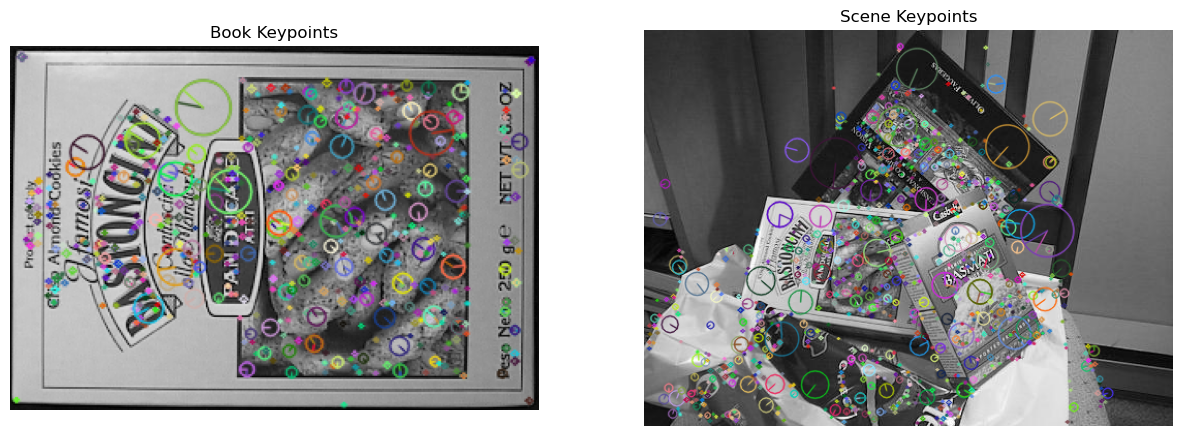

In [29]:
sift = cv2.SIFT_create()
kp1, desc1 = sift.detectAndCompute(img1, None)
kp2, desc2 = sift.detectAndCompute(img2, None)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.drawKeypoints(img1.copy(), kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.title("Book Keypoints")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.drawKeypoints(img2.copy(), kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.title("Scene Keypoints")
plt.axis("off")

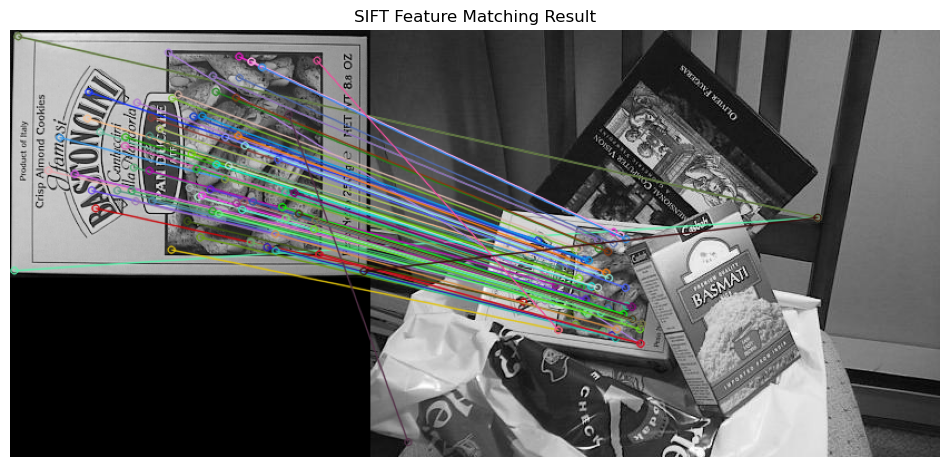

In [30]:
# Match features
matches_idx = match_features(desc1, desc2, ratio_thresh=0.75)

# Convert matches to cv2.DMatch format
matches = [cv2.DMatch(idx1, idx2, 0) for idx1, idx2 in matches_idx]

# Draw matches using OpenCV
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(12, 6))
plt.imshow(img_matches, cmap="gray")
plt.title("SIFT Feature Matching Result")
plt.axis("off")
plt.show()